## equity price in sector

In [1]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline


# pip install numpy
# conda install -c anaconda pandas
# conda install -c conda-forge matplotlib

import datetime as dt # For defining dates

import time

# In Powershell Prompt : conda install -c conda-forge multitasking
# pip install -i https://pypi.anaconda.org/ranaroussi/simple yfinance

import yfinance as yf

# To show all your output File -> Preferences -> Settings Search for Notebook
# Notebook Output Text Line Limit and set to 100

# Used for file handling like deleting files
import os

# conda install -c conda-forge cufflinks-py
# conda install -c plotly plotly
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

from plotly.subplots import make_subplots

# New Imports
# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

import warnings
warnings.simplefilter("ignore")

from IPython.display import display
# Setting display options to show all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

import os
import sys
import seaborn as sns
# from pathlib import Path
# _this_dir = Path(__file__).parent.parent
from dataset.us_equity_load import *
from utils.us_equity_utils import *

from factor.xq_finance import *
from dataset.us_equity_load import *


In [2]:

# sector_name = "IT_Services"
# sector_name = "Entertainment"
# sector_name = "Semiconductors_&_Semiconductor_Equipment"
# sector_name = "Automobiles"
# sector_name = "Internet_Retail"
sector_name = 'Trading_Companies_&_Distributors'

symbols = us_equity_symbol_load()

symbols = us_dir1_load_csv(dir0 = 'symbol', dir1 = 'fh', filename= sector_name +'.csv')['symbol'].values

print("symbol list len ", len(symbols))

factors = ['roe', 'roa', 'gross_profit_revenue', 'profit_revenue', 'revenue_increase_q2q_rate', 'cash_increase_q2q_rate', 'profit_increase_q2q_rate']
start_date = '2023-06-01'
end_date = '2024-06-01'
us_analysis_finance = xq_finance(symbols, factors,  start_date, end_date)
result = us_analysis_finance.finance_factors_rank(factors)

us_equity_research_folder("finance", sector_name + start_date + "_" + end_date + ".csv", result[2])

# us_equity_research_folder("finance", 'finance_factors_rank.csv', result)
# print(result)
display(result[0])
display(result[1])
display(result[2])

symbol list len  16
no finance data skip stock HBP
no finance data skip stock HWCC
no finance data skip stock LAWS
no finance data skip stock SYX
no finance data skip stock WCC-PA
no finance data skip stock WSO-B


,roe,roa,gross_profit_revenue,profit_revenue,revenue_increase_q2q_rate,cash_increase_q2q_rate,profit_increase_q2q_rate,mean_scale
symbol,,,,,,,,
GWW,13.97,5.78,39.28,11.37,3.93,80.11,4.39,8.29
FAST,8.49,6.37,45.59,15.67,2.14,60.02,3.80,7.71
AIT,5.98,3.36,29.47,8.37,1.61,294.03,8.96,7.00
DXPE,4.21,1.43,30.24,3.75,1.51,565.15,24.45,5.86
WSO,5.80,3.75,27.03,8.11,3.60,-420.03,-9.06,5.57
MSM,5.38,3.11,40.99,7.82,-0.21,199.56,-12.32,5.43
FERG,8.81,2.89,30.46,6.27,-0.38,74.40,2.15,5.29
TITN,3.79,1.39,19.15,3.38,15.64,157.27,-9.59,4.43
WCC,3.49,1.13,21.48,3.07,-0.18,1111.30,-20.13,3.43


,roe,roa,gross_profit_revenue,profit_revenue,revenue_increase_q2q_rate,cash_increase_q2q_rate,profit_increase_q2q_rate,mean_scale
symbol,,,,,,,,
GWW,10.0,9.0,8.0,9.0,9.0,5.0,8.0,8.29
FAST,8.0,10.0,10.0,10.0,6.0,3.0,7.0,7.71
AIT,7.0,7.0,5.0,8.0,5.0,8.0,9.0,7.00
DXPE,4.0,4.0,6.0,4.0,4.0,9.0,10.0,5.86
WSO,6.0,8.0,4.0,7.0,8.0,1.0,5.0,5.57
MSM,5.0,6.0,9.0,6.0,2.0,7.0,3.0,5.43
FERG,9.0,5.0,7.0,5.0,1.0,4.0,6.0,5.29
TITN,3.0,3.0,2.0,3.0,10.0,6.0,4.0,4.43
WCC,2.0,2.0,3.0,2.0,3.0,10.0,2.0,3.43


,,roe,roa,gross_profit_revenue,profit_revenue,revenue_increase_q2q_rate,cash_increase_q2q_rate,profit_increase_q2q_rate
REPORT,symbol,,,,,,,
2023-06-29 16:00:00.004,AIT,6.32,3.36,29.23,7.96,9.00,1225.85,19.95
2023-09-29 16:00:00.000,AIT,6.11,3.41,29.68,8.57,3.29,-25.46,16.62
2023-12-30 16:00:00.000,AIT,5.67,3.28,29.44,8.47,-4.85,2.40,-6.13
2024-03-30 16:00:00.000,AIT,5.82,3.41,29.51,8.48,-1.01,-26.69,5.42
2023-06-29 16:00:00.000,DXPE,5.16,1.84,30.80,4.45,10.51,964.58,46.07
2023-09-29 16:00:00.000,DXPE,4.45,1.55,29.95,3.86,3.19,982.03,101.22
2023-12-30 16:00:00.005,DXPE,4.20,1.36,30.18,3.93,-4.06,301.61,-8.95
2024-03-30 16:00:00.000,DXPE,3.02,0.96,30.02,2.75,-3.60,12.37,-40.53
2023-06-29 16:00:00.000,FAST,8.81,6.51,45.54,15.82,4.48,8.06,4.71


      2024-07-08
DXPE   32.769032
WSO    22.666055
AIT     5.431373
GWW     2.364533
FERG    0.718437
PKOH   -5.542630
FAST   -8.411074
WCC   -10.079209
MSM   -20.963288
TITN  -44.837548


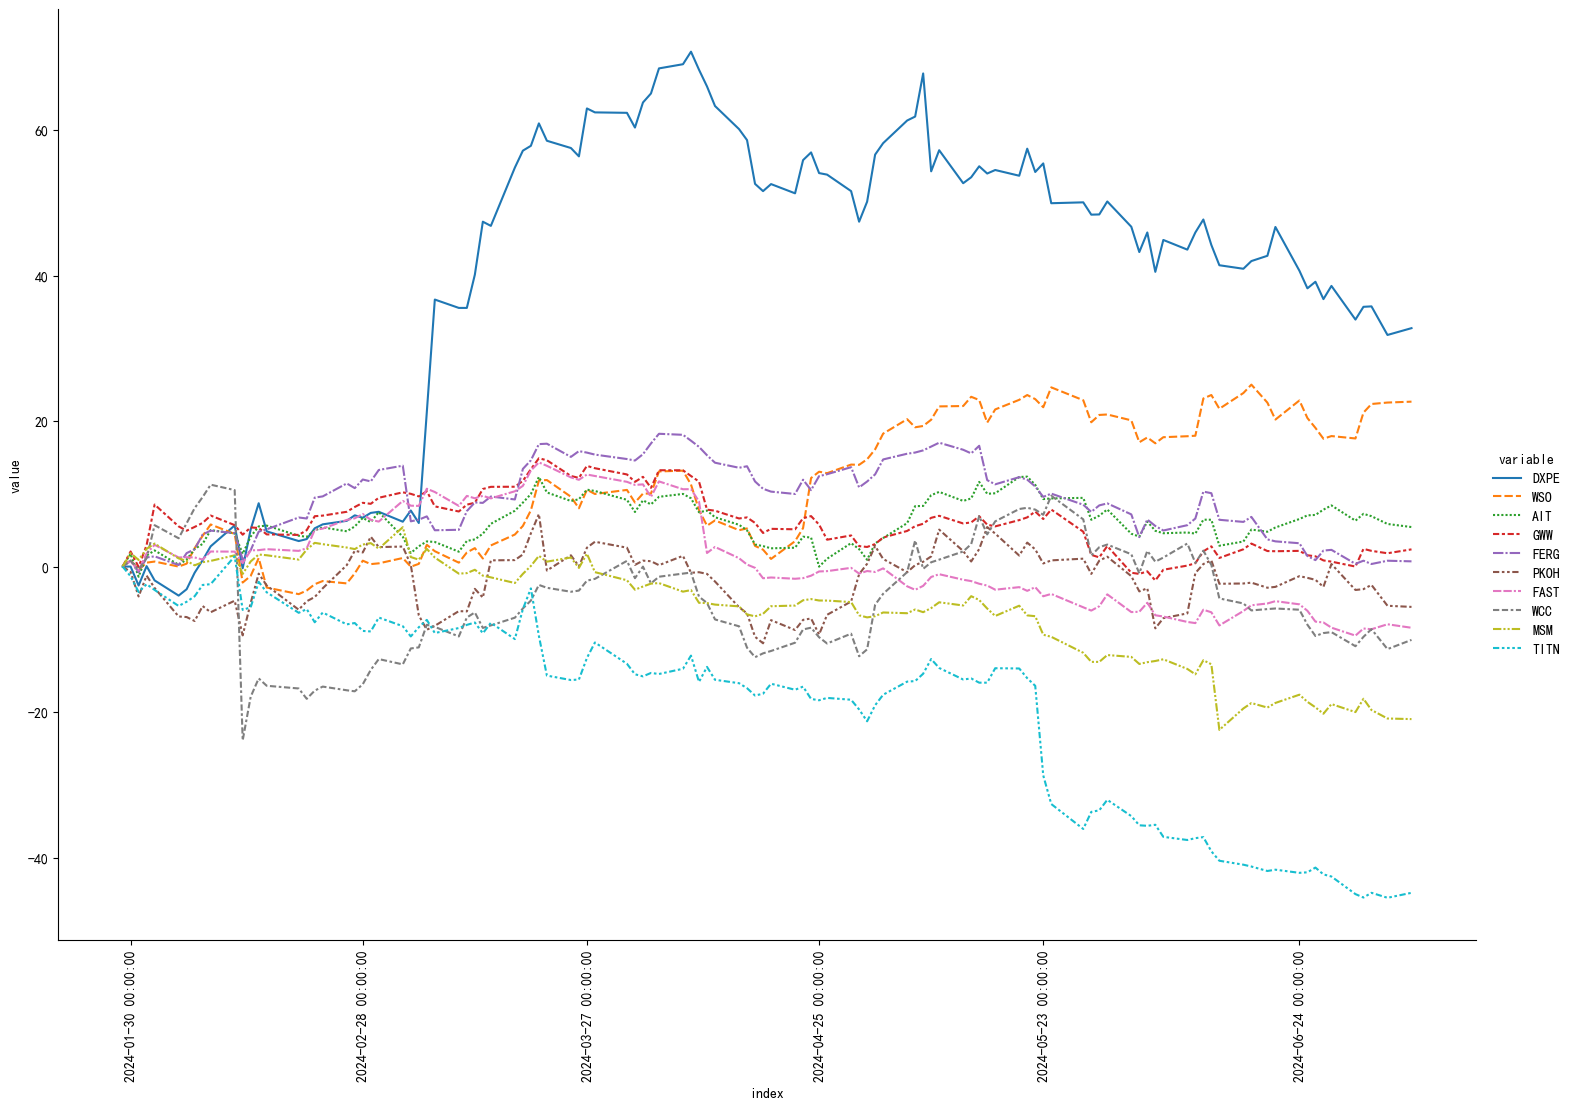

In [6]:
from utils.us_equity_utils import *

# symbols = ["AMZN", "AAPL", "NFLX", "GOOG"]
symbols = result[0].index
# symbols = us_equity_symbol_load().head(2000)
# data = us_equity_daily_data_load(symbols = symbols, option = 'close')

start_date = '2024-01-29'
end_date = '2024-07-08'

data = us_equity_daily_data_load(symbols = symbols, start_date = start_date, end_date = end_date, trade_option = 'close')
data = pd.DataFrame(data)
data = data.sub(data.iloc[0, :], axis=1).div(data.iloc[0, :], axis=1) * 100

sorted_columns = data.iloc[-1].sort_values(ascending=False).index
data = data[sorted_columns]
# data = data.loc[:, data.iloc[-1] > 30]

file = sector_name + start_date + "_" + end_date + ".csv"
folder = us_equity_research_folder(sub_folder = "price", file_name = file, data = data)

print(data.tail(1).transpose())

# Convert the DataFrame to long format
df_long = data.reset_index().melt(id_vars='index', var_name='variable', value_name='value')

# Create a line plot using Seaborn's relplot
g = sns.relplot(
    data=df_long, 
    x='index', 
    y='value', 
    hue='variable', 
    kind='line',
    style='variable',  # Different line styles for each variable
    height=10,    # Height of each facet
    aspect=1.5  # Aspect ratio of each facet
)


# Rotate x-axis labels and set only a subset of ticks
for ax in g.axes.flat:
    x = data.index[1:-1:20]
    ax.set_xticks(x)  # Set the desired tick positions
    ax.set_xticklabels(x)  # Set the desired tick labels
    for label in ax.get_xticklabels():
        label.set_rotation(90)